## CNN Layers

There are number of layer which contribute to CNN in classifying the image. In VGG-16 neural net architecture, the following layers are present in classifying the image.

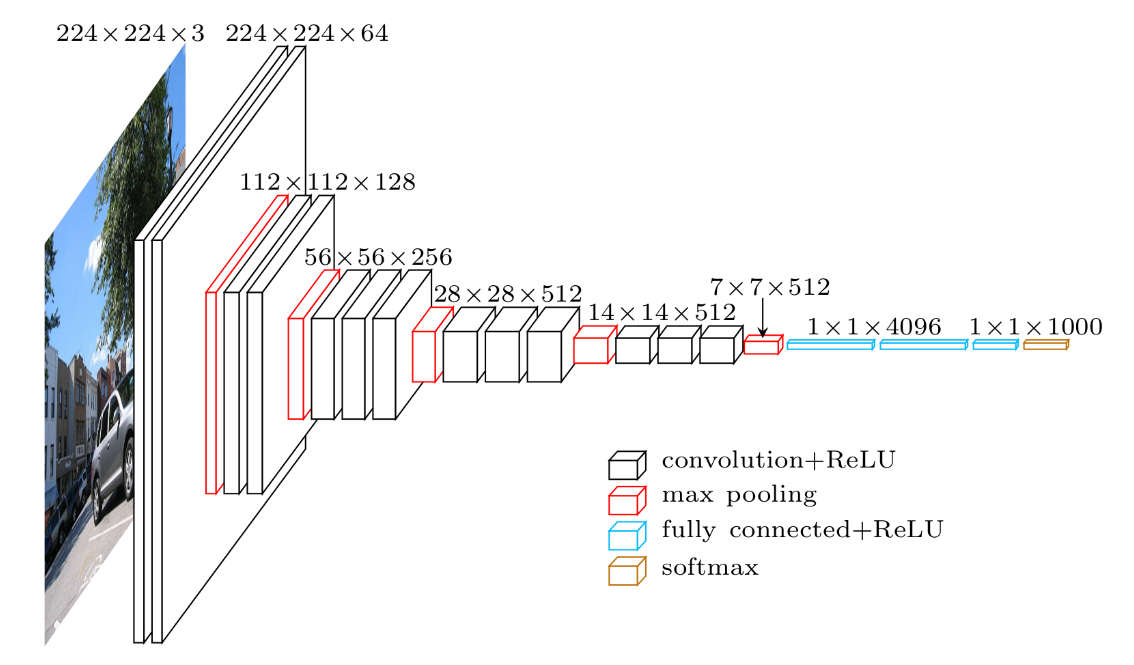

In [1]:
from IPython.display import Image
Image(filename='/Users/mayurjain/Desktop/cv_images/vgg-16.png')

## Convolutional Layer

As the name suggests, the first layer in CNN is **convolutional layer**. It performs convolution operation between the 
input image and convolutional filters or kernels. Now, each filter or kernels learns a different set of features from the image and output a maps called as activation map. Activation map is a feature map generated by kernel or filter. I have mentioned the term learns by which i mean, during the backpropagation operation the kernel values are learnt in a sense that it reduce the error between the estimated and actual image.

Sharing link of Pytorch https://pytorch.org/docs/stable/nn.html, which has all layers information for building CNN.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

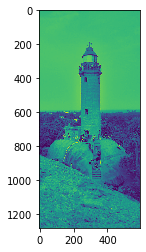

In [3]:
img = cv2.imread("/Users/mayurjain/Desktop/cv_images/light_house_2.jpg")
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
img_norm = img_gray.astype("float32")/255

plt.imshow(img_norm)

In [4]:
#creating Convolution Filter/Kernel to convolve with input image to identify the feature maps or activation maps

filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape,"\n")
print(filter_vals)

Filter shape:  (4, 4) 

[[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


In [5]:
# Different variants of filters

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print(filter_1, "\n")
print(filter_2, "\n")
print(filter_3, "\n")
print(filter_4, "\n")

[[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]] 

[[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]] 

[[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]] 

[[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]] 



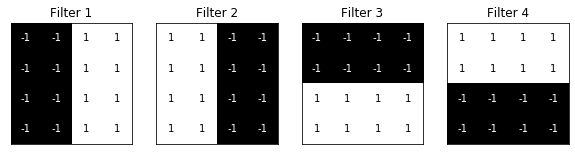

In [6]:
# Visualizing the filters

fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [19]:
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        # pooling layer defined
        self.pool = nn.MaxPool2d(4, 4)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        #pooling layer
        pooled_x = self.pool(activated_x)

        
        # returns both layers
        return conv_x, activated_x, pooled_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)


In [20]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

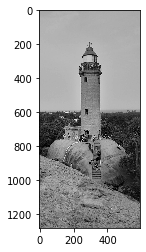

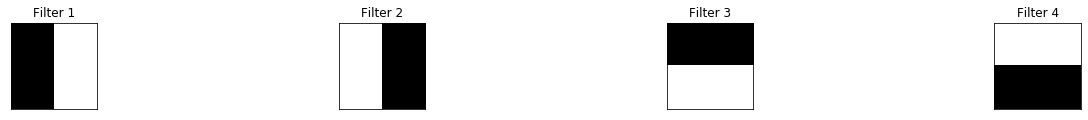

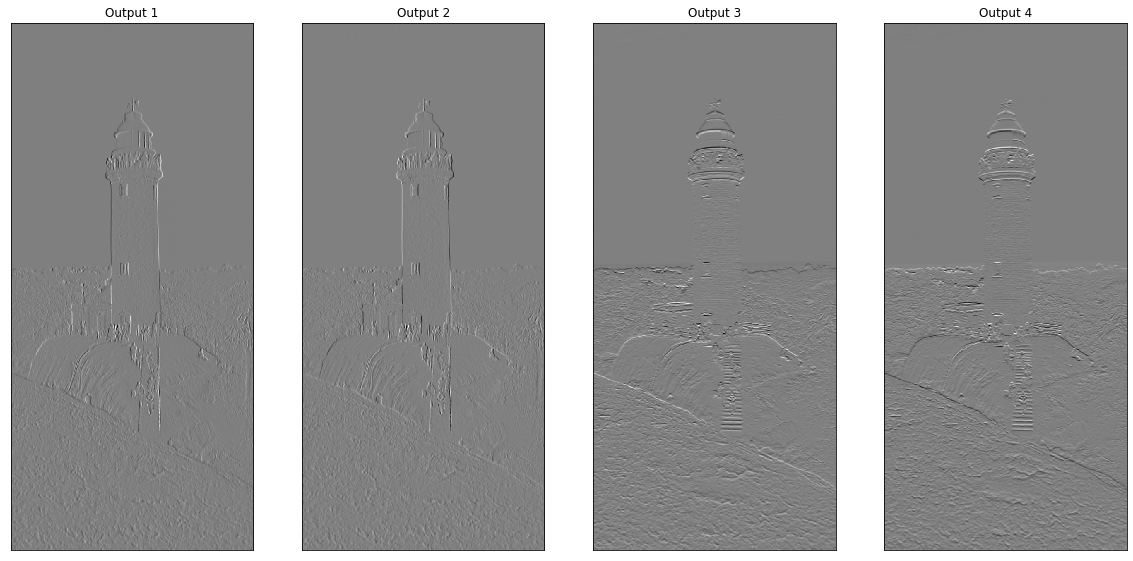

In [21]:
# plot original image
plt.imshow(img_norm, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(img_norm).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

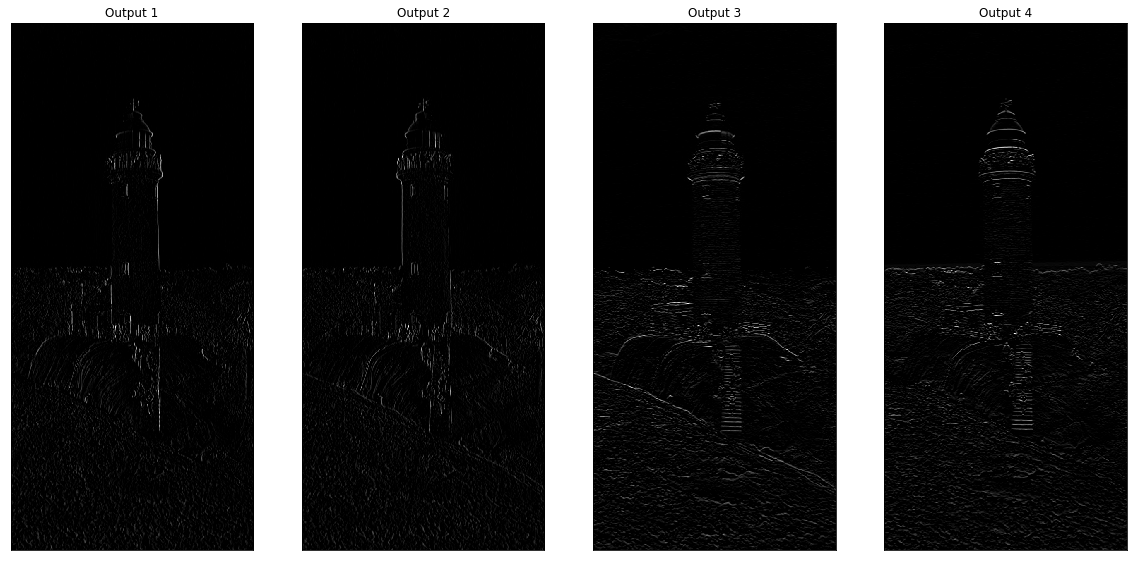

In [22]:
# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)

From above images, we can clearly see that vertical filter i.e. the vertical kernel with light side detects the vertical edges and horizontal kernel filters the horizontal edges of the images.

## Pooling Layer

The output from convolutional + Relu function is feature maps/ Activation maps, is feed into pooling layers. Pooling layers tends to reduce the dimension of the activation maps by ridding a layer (here, 2x2 filter with stride 2 is applied) over activation maps, looking for max value if maxpooling is applied or average value if average pooling is applied.

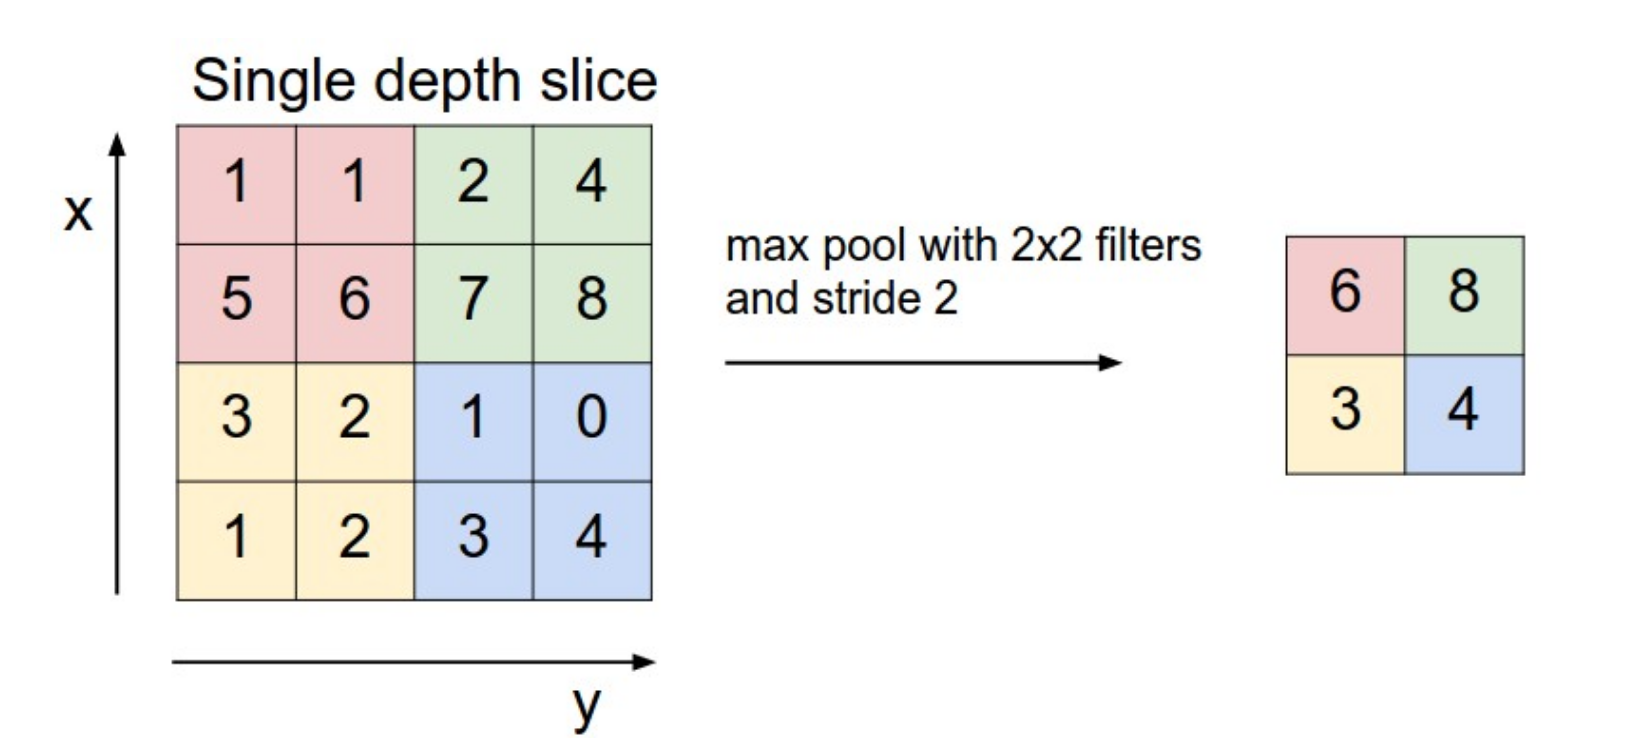

In [23]:
Image(filename='/Users/mayurjain/Desktop/cv_images/pooling.png')

**self.pool = nn.MaxPool2d(4, 4)**

**pooled_x = self.pool(activated_x)**

This is the piece of line, which performs pooling operation on the activation maps. From below images, maxpooling highlights the points which are 

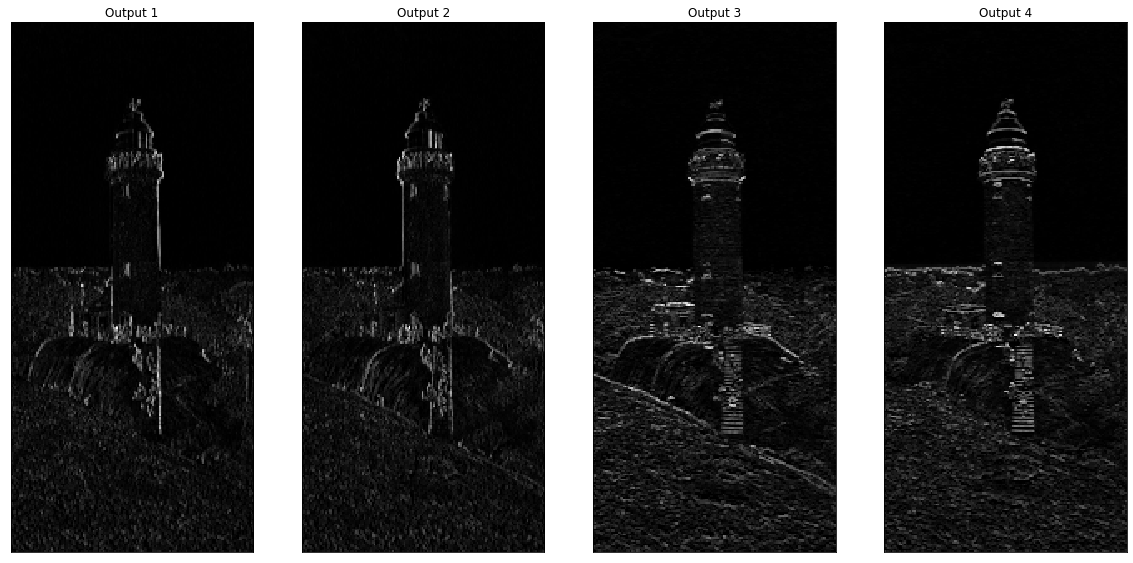

In [25]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)

## Fully Connected Layer

Last and final layer, FC takes the output from the pooling layer, which is in matrix format and convert or flatten it 
into vector of classes. Now, if there are ten classes then a vector of 10 element is outputted. But before taking the vector or flattened output, the vector goes through a layer called as softmax layer if there are more than 2 classes or else it pass through sigmoid function for binary classification problem, the softmax gives out the probability distribution of the vector, in range of (0,1).

### Other Layer 

Dropout layers essentially turn off certain nodes in a layer with some probability, p. This ensures that all nodes get an equal chance to try and classify different images during training, and it reduces the likelihood that only a few, heavily-weighted nodes will dominate the process. It helps in reducing the overfitting in the network.

dropout layer - http://pytorch.org/docs/stable/nn.html#dropout-layers